# Data Science Bowl 2017 - Image processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import SimpleITK
%matplotlib inline
pd.set_option("display.max_columns",101)

### Baseline logloss (predicting 0% proba for all samples): 9.94298

1. [Define display functions](#Part1)
2. [Define functions to load in images](#Part2)
3. [Import labels](#Part3)
4. [Load patient data](#Part4)
5. [Define functions to pre-process images](#Part5)

<a id='Part1'></a>

### 1. Define display functions

In [2]:
# Define a function to display one ITK image

def sitk_show(img, title=None, margin=0.0, dpi=40, axis='off'):
    nda = SimpleITK.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    ax.axis(axis)
    
    if title:
        plt.title(title)
    
    plt.show()

In [3]:
# Define a function to display several slices of the 4 sequences 

def sitk_show_slices(img, margin=0.05, dpi=40, axis='off', size=(10,10)):
    length = np.sqrt(img.GetSize()[2])
    length = int(np.ceil(length))
    fig, im = plt.subplots(length, length, figsize=size)
        
    for i in range(0, img.GetSize()[2]-length, length):
        imgs = [img[:,:,j] for j in range(i, i+length)]
        for j in range(length):
            nda = SimpleITK.GetArrayFromImage(imgs[j])
            spacing = imgs[j].GetSpacing()
            figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
            extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)

            plt.set_cmap("gray")
            im[i/length,j].imshow(nda,extent=extent,interpolation=None)
            im[i/length,j].axis(axis)
        
    last_imgs = [img[:,:,j] for j in range(length**2-length, img.GetSize()[2])] 
    for j in range(length - (length**2 - img.GetSize()[2])):
        nda = SimpleITK.GetArrayFromImage(last_imgs[j])
        spacing = last_imgs[j].GetSpacing()
        figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
        extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)

        plt.set_cmap("gray")
        im[length-1, j].imshow(nda,extent=extent,interpolation=None)
        im[length-1, j].axis(axis)

    fig.show()

<a id='Part2'></a>

### 2. Define functions to load in images

In [4]:
# Define function to import scans for one patient

def import_img_series(path):
    reader = SimpleITK.ImageSeriesReader()
    filenamesDICOM = reader.GetGDCMSeriesFileNames(path)
    reader.SetFileNames(filenamesDICOM)
    return reader.Execute()

In [5]:
# Define funcion to load in DICOM images

def load_images(patient_id):
    path = "../stage1/"+patient_id
    img = import_img_series(path)
    return img

# Define function to load in images as intensity arrays

def load_array(patient_id):
    return SimpleITK.GetArrayFromImage(load_images(patient_id))  #Does this return a 3D array?? Dowe need NIFTI?

<a id='Part3'></a>

### 3. Import labels

In [6]:
train_labels = pd.read_csv('stage1_labels.csv')
train_labels.head()

,id,cancer
0,0015ceb851d7251b8f399e39779d1e7d,1
1,0030a160d58723ff36d73f41b170ec21,0
2,003f41c78e6acfa92430a057ac0b306e,0
3,006b96310a37b36cccb2ab48d10b49a3,1
4,008464bb8521d09a42985dd8add3d0d2,1


In [7]:
train_labels['cancer'].value_counts()

0    1035
1     362
Name: cancer, dtype: int64

<a id='Part4'></a>

### 4. Load patient data

#### Patient 1 - Test

In [8]:
patient1 = load_images(train_labels.loc[0, 'id'])

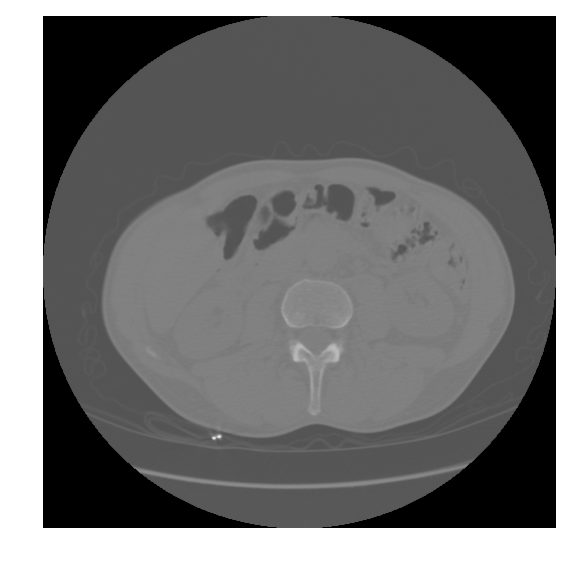

In [9]:
sitk_show(patient1[:,:,0], dpi=100)

/Users/chloe/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


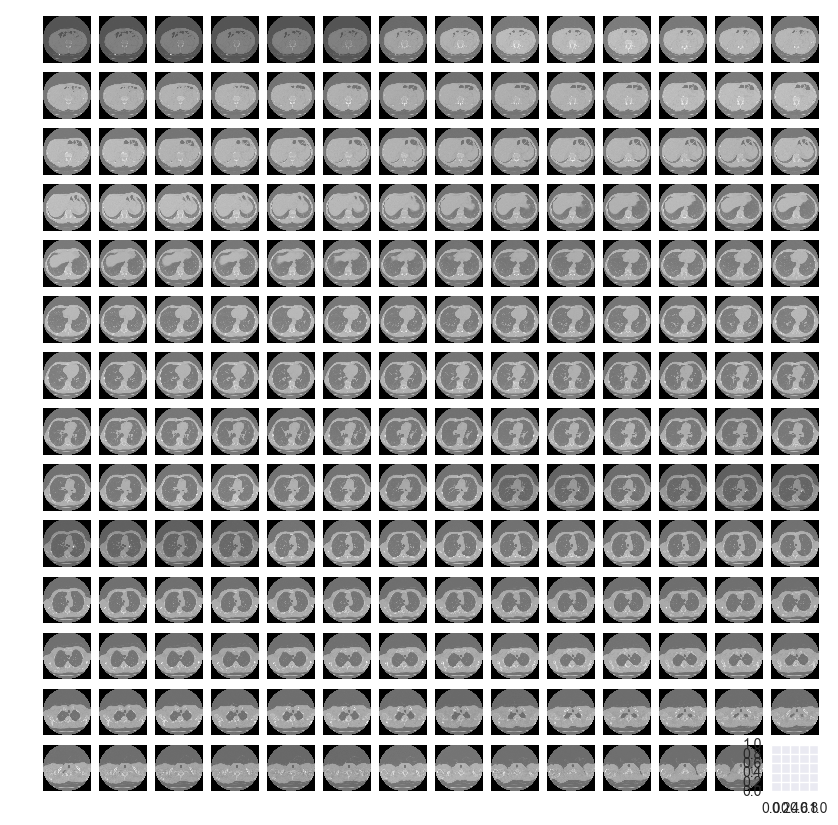

In [10]:
sitk_show_slices(patient1)

In [11]:
# Get image size
patient1.GetSize()

(512, 512, 195)

In [12]:
# Get 3D array from patient image
SimpleITK.GetArrayFromImage(patient1)

array([[[-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        ..., 
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024]],

       [[-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        ..., 
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024]],

       [[-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        ..., 
        [-3024, -3024, -3024, ..., -3024, -3024, -3024],
        [-3024, -3024, -3024, ..., -3024, 

#### Other patients

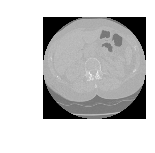

In [13]:
patient2 = load_images(train_labels.loc[1, 'id'])
sitk_show(patient2[:,:,0], dpi=500)

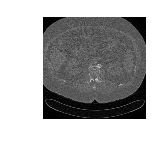

In [14]:
patient3 = load_images(train_labels.loc[2, 'id'])
sitk_show(patient3[:,:,0], dpi=500)

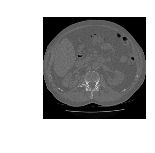

In [15]:
patient4 = load_images(train_labels.loc[3, 'id'])
sitk_show(patient4[:,:,0], dpi=500)

<a id='Part5'></a>

## 5. Define functions to pre-process images

### a. Remove noise

In [16]:
# Define a fuction to remove image noise

def remove_noise(img):
    imgSmooth = SimpleITK.CurvatureFlow(image1=img, timeStep=0.125, numberOfIterations=5)
    return imgSmooth

### b. Reshape to 512x512x94

In [17]:
# Find minimum depth in the database
depths = []
for i in range(train_labels.shape[0]):
    patient = load_images(train_labels.loc[i, 'id'])
    depths.append(patient.GetSize()[2])

print 'Minimum depth:', min(depths)

KeyboardInterrupt: 

In [19]:
# Define a function to reshape images - depth assigned to minimum

def reshape_image(img):
    # Define resample filter to match T1 image dimension and settings
    resample = SimpleITK.ResampleImageFilter()
    resample.SetInterpolator(SimpleITK.sitkBSpline)
    resample.SetSize((512,512,94))

    # Resize all other three images
    img_Resized = resample.Execute(img)

    return img

### c. Thresholding 
Standardize the pixel values - and remove black halos

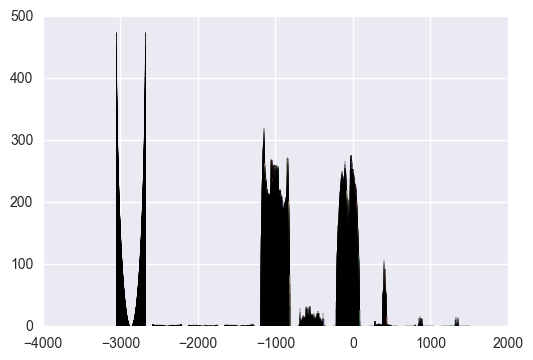

In [26]:
# Show histogramme for patient 1
plt.hist(SimpleITK.GetArrayFromImage(patient1[:,:,0])) # Pixel values in HU
plt.show()

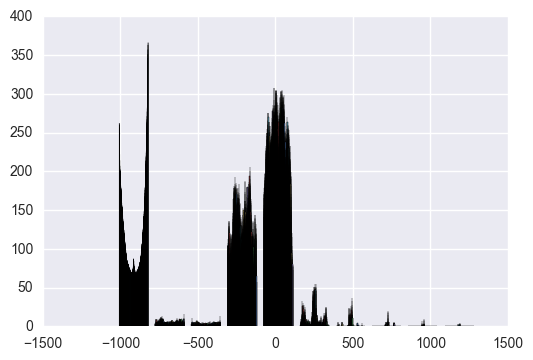

In [27]:
# Show histogramme for patient 3 (no circle around the image)
plt.hist(SimpleITK.GetArrayFromImage(patient3[:,:,0]))
plt.show()

#### OPTION 1

##### First method to remove black halos: change pixel values

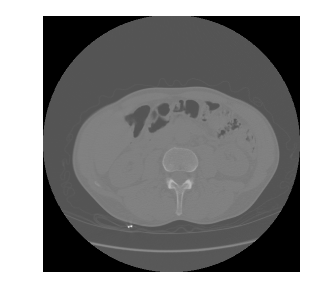

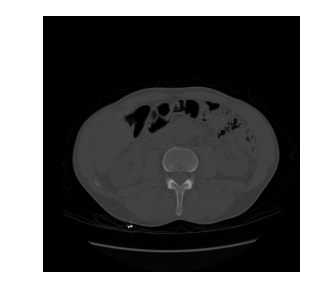

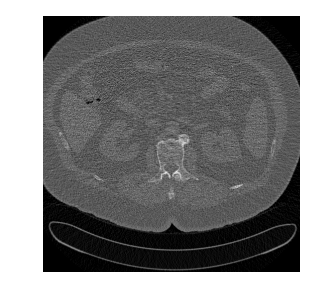

In [20]:
arr_patient1 = SimpleITK.GetArrayFromImage(patient1)
arr_patient3 = SimpleITK.GetArrayFromImage(patient3)

arr_patient1[arr_patient1 < -1000] = -1000

patient1_nohalo = SimpleITK.GetImageFromArray(arr_patient1)

sitk_show(patient1[:,:,0], dpi=200)
sitk_show(patient1_nohalo[:,:,0], dpi=200)
sitk_show(patient3[:,:,0], dpi=200)

##### Connected Filter segmentation based on seeds generated from thresholding segmentation

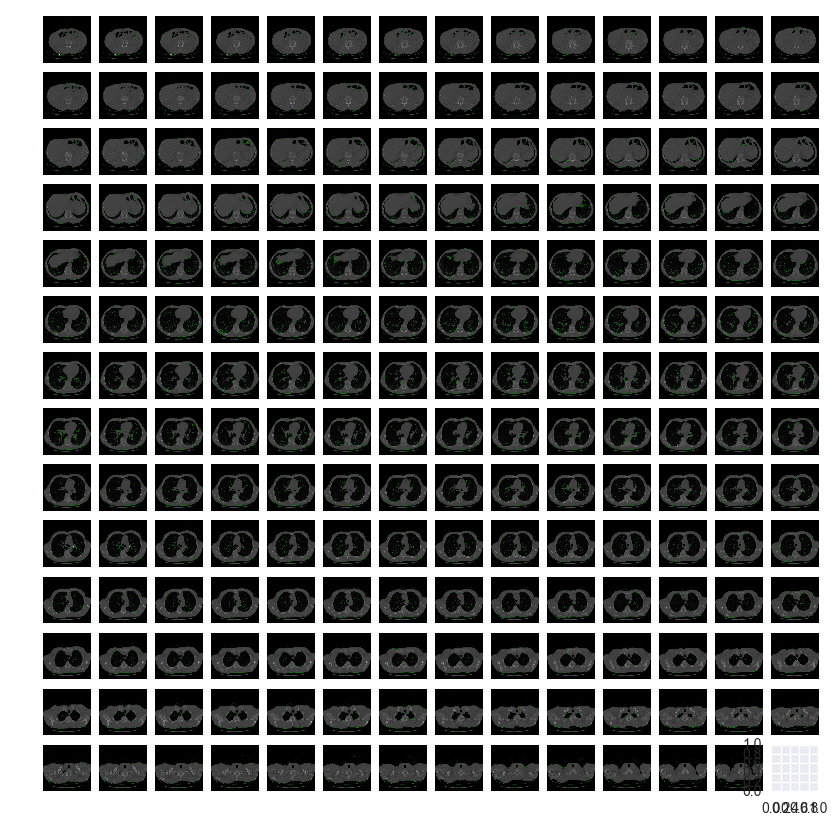

In [53]:
# Segment lungs based on intensity values - Lungs ~ -500HU

lung_thres = SimpleITK.BinaryThreshold(patient1_nohalo, lowerThreshold=-600, 
                                       upperThreshold=-400, insideValue=1, outsideValue=0)

# Rescale images intensity and change pixel type so they can be diplayed on the same image as lung_thres
patient1Int = SimpleITK.Cast(SimpleITK.RescaleIntensity(patient1_nohalo), lung_thres.GetPixelID())

    
sitk_show_slices(SimpleITK.LabelOverlay(patient1Int, lung_thres))

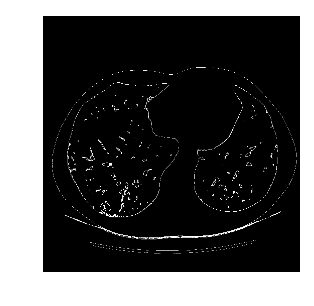

In [56]:
sitk_show(lung_thres[:,:,70], dpi=200)

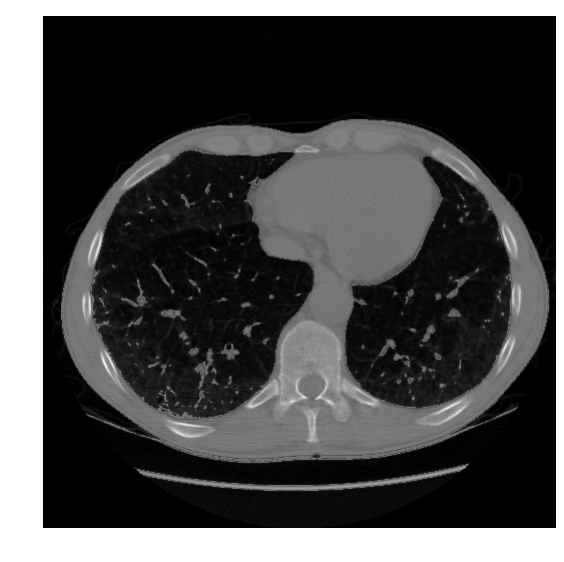

In [66]:
# Find coordinates of points inside lungs - AUTOMATICALLY
# These will be used as seeds for the Confidence Connected filter that we will use to isolate the lungs

# In this case we will use all the point that were identified by the initial thresholding
seeds_auto = np.argwhere(SimpleITK.GetArrayFromImage(lung_thres)==1)

# Inverse dimensions as the function GetArryFromImage returns vertical image values in lines and horizontal image values in columns 
for seed in seeds_auto:
    seed[0], seed[1], seed[2] = seed[2], seed[1], seed[0]
    
# Only take points from the middle images


In [75]:
seeds = []
for seed in seeds_auto:
    if seed[0]>250 and seed[0]<350 and seed[1]>250 and seed[1]<350 and seed[2]>40 and seed[2]<70:
            seeds.append([seed[0], seed[1], seed[2]])

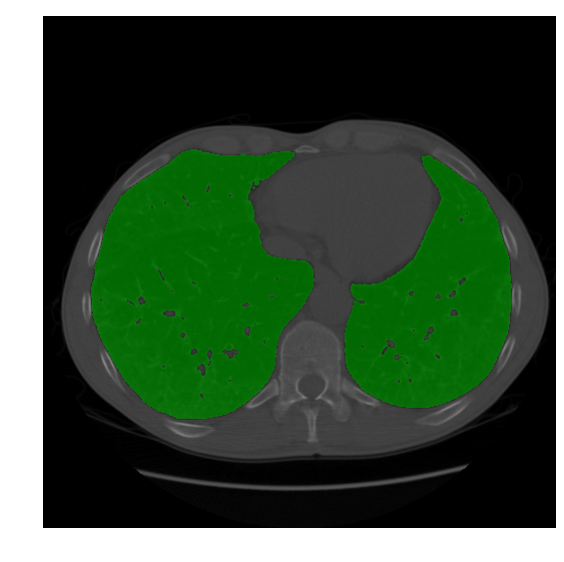

In [79]:
# Refine tumour segmentation based on list of seeds previously assigned with Confidence Connected filter
imgLungs = SimpleITK.ConfidenceConnected(image1=patient1_nohalo, 
                                               seedList=seeds,
                                               numberOfIterations=3,
                                               multiplier=1.9,
                                               replaceValue=1)

# Display resulting segmentation on top of composed image
sitk_show(SimpleITK.LabelOverlay(patient1Int[:,:,70], imgLungs[:,:,70]), dpi=100)

#### OPTION 2: Method from kaggle tutorial - needs to be improved to work in 3D

In [40]:
from sklearn.cluster import KMeans

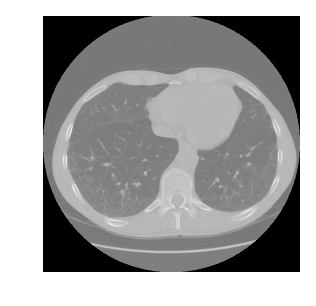

In [38]:
# Try method on slice 50
sitk_show(patient1[:,:,70], dpi=200)

In [45]:
# Produce a satisfactory separation of regions for both types of images 
# and eliminate the black halo in some images

img = SimpleITK.GetArrayFromImage(patient1[:,:,70])

middle = img[100:400,100:400] 
mean = np.mean(middle)  
max = np.max(img)
min = np.min(img)
#move the underflow bins
img[img==max]=mean
img[img==min]=mean
kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
threshold = np.mean(centers)
thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image

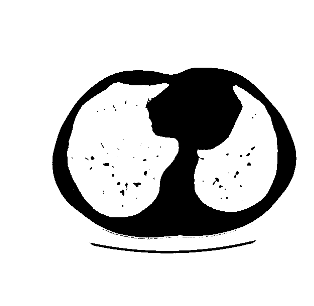

In [47]:
sitk_show(SimpleITK.GetImageFromArray(thresh_img), dpi=200)

Erosion and Dilation 

We then use an erosion and dilation to fill in the incursions into the lungs region by radio-opaque tissue, followed by a selection of the regions based on the bounding box sizes of each region. The initial set of regions looks like

In [48]:
from skimage import morphology, measure

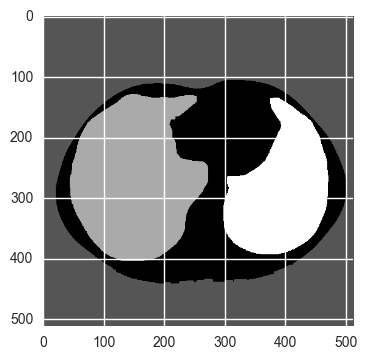

In [49]:
eroded = morphology.erosion(thresh_img,np.ones([4,4]))
dilation = morphology.dilation(eroded,np.ones([10,10]))
labels = measure.label(dilation)
label_vals = np.unique(labels)
plt.imshow(labels)

Cutting non-ROI Regions 

The cuts applied to each region bounding box were determined empirically and seem to work well for the LUNA data, but may not be generally applicable

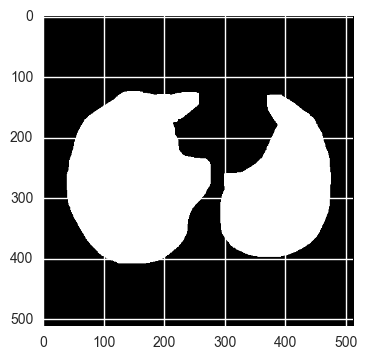

In [50]:
labels = measure.label(dilation)
label_vals = np.unique(labels)
regions = measure.regionprops(labels)
good_labels = []
for prop in regions:
    B = prop.bbox
    if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472:
        good_labels.append(prop.label)
mask = np.ndarray([512,512],dtype=np.int8)
mask[:] = 0
#
#  The mask here is the mask for the lungs--not the nodes
#  After just the lungs are left, we do another large dilation
#  in order to fill in and out the lung mask 
#
for N in good_labels:
    mask = mask + np.where(labels==N,1,0)
mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation
plt.imshow(mask,cmap='gray')

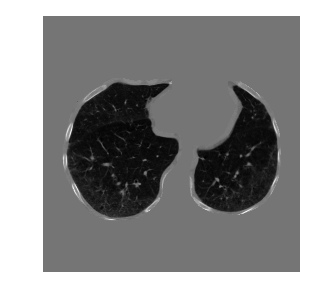

In [51]:
sitk_show(SimpleITK.GetImageFromArray(img*mask), dpi = 200)

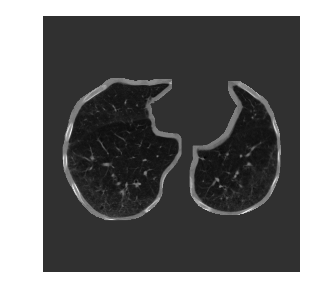

In [52]:
# renormalizing the masked image (in the mask region)
#
new_mean = np.mean(img[mask>0])  
new_std = np.std(img[mask>0])
#
#  Pushing the background color up to the lower end
#  of the pixel range for the lungs
#
old_min = np.min(img)       # background color
img[img==old_min] = new_mean-1.2*new_std   # resetting backgound color
img = img-new_mean
img = img/new_std

sitk_show(SimpleITK.GetImageFromArray(img*mask), dpi = 200)